In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)    # 下载iris数据集
#data = pd.read_csv('./data/iris.data.csv', header=None)
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'species']    # 特征及类别名称

In [2]:
X = data.iloc[0:150, 0:4].values
y = data.iloc[0:150, 4].values
y[y == 'Iris-setosa'] = 0                                 # Iris-setosa 输出label用0表示
y[y == 'Iris-versicolor'] = 1                             # Iris-versicolor 输出label用1表示
y[y == 'Iris-virginica'] = 2                              # Iris-virginica 输出label用2表示
X_setosa, y_setosa = X[0:50], y[0:50]                     # Iris-setosa 4个特征
X_versicolor, y_versicolor = X[50:100], y[50:100]         # Iris-versicolor 4个特征
X_virginica, y_virginica = X[100:150], y[100:150]         # Iris-virginica 4个特征

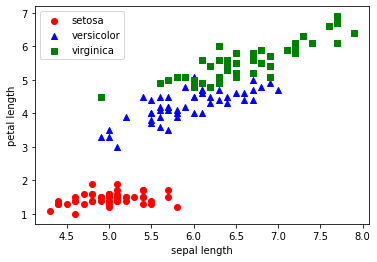

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X_setosa[:, 0], X_setosa[:, 2], color='red', marker='o', label='setosa')
plt.scatter(X_versicolor[:, 0], X_versicolor[:, 2], color='blue', marker='^', label='versicolor')
plt.scatter(X_virginica[:, 0], X_virginica[:, 2], color='green', marker='s', label='virginica')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc = 'upper left')
plt.show()

In [4]:
# training set
X_setosa_train = X_setosa[:30, :]
y_setosa_train = y_setosa[:30]
X_versicolor_train = X_versicolor[:30, :]
y_versicolor_train = y_versicolor[:30]
X_virginica_train = X_virginica[:30, :]
y_virginica_train = y_virginica[:30]
X_train = np.vstack([X_setosa_train, X_versicolor_train, X_virginica_train])
y_train = np.hstack([y_setosa_train, y_versicolor_train, y_virginica_train])

# validation set
X_setosa_val = X_setosa[30:40, :]
y_setosa_val = y_setosa[30:40]
X_versicolor_val = X_versicolor[30:40, :]
y_versicolor_val = y_versicolor[30:40]
X_virginica_val = X_virginica[30:40, :]
y_virginica_val = y_virginica[30:40]
X_val = np.vstack([X_setosa_val, X_versicolor_val, X_virginica_val])
y_val = np.hstack([y_setosa_val, y_versicolor_val, y_virginica_val])

# test set
X_setosa_test = X_setosa[40:50, :]
y_setosa_test = y_setosa[40:50]
X_versicolor_test = X_versicolor[40:50, :]
y_versicolor_test = y_versicolor[40:50]
X_virginica_test = X_virginica[40:50, :]
y_virginica_test = y_virginica[40:50]
X_test = np.vstack([X_setosa_test, X_versicolor_test, X_virginica_test])
y_test = np.hstack([y_setosa_test, y_versicolor_test, y_virginica_test])

In [67]:
class KNN(object):
   def __init__(self):
       pass

   # 训练函数
   def train(self, X, y):
       self.X_train = X
       self.y_train = y

   # 预测函数
   def predict(self, X, k=1):
       # 计算L2距离
       num_test = X.shape[0]
       
       num_train = self.X_train.shape[0]
  
       dists = np.zeros((num_test, num_train))    # 初始化距离函数
       # because(X - X_train)*(X - X_train) = -2X*X_train + X*X + X_train*X_train, so
       d1 = -2 * np.dot(X, self.X_train.T)    # shape (num_test, num_train)
       d2 = np.sum(np.square(X), axis=1, keepdims=True)    # shape (num_test, 1)
       d3 = np.sum(np.square(self.X_train), axis=1)    # shape (1, num_train)  
       c=d1+d2  
       dist = np.sqrt(d1 + d2 + d3)
       # 根据K值，选择最可能属于的类别

       y_pred = np.zeros(num_test)
       for i in range(num_test):
           dist_k_min = np.argsort(dist[i])[:k]    # 最近邻k个实例位置
           y_kclose = self.y_train[dist_k_min]     # 最近邻k个实例对应的标签
           y_pred[i] = np.argmax(np.bincount(y_kclose.tolist()))    # 找出k个标签中从属类别最多的作为预测类别

       return y_pred

In [68]:
KNN=KNN()
KNN.train(X_train, y_train)
y_pred = KNN.predict(X_test, k=6)
accuracy = np.mean(y_pred == y_test)
print('测试集预测准确率：%f' % accuracy)

测试集预测准确率：1.000000


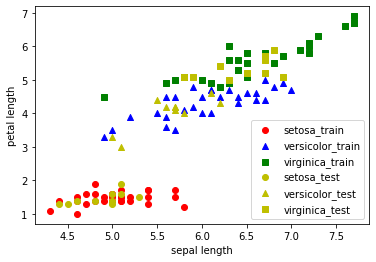

In [40]:
# 训练集
plt.scatter(X_setosa_train[:, 0], X_setosa_train[:, 2], color='red', marker='o', label='setosa_train')
plt.scatter(X_versicolor_train[:, 0], X_versicolor_train[:, 2], color='blue', marker='^', label='versicolor_train')
plt.scatter(X_virginica_train[:, 0], X_virginica_train[:, 2], color='green', marker='s', label='virginica_train')
# 测试集
plt.scatter(X_setosa_test[:, 0], X_setosa_test[:, 2], color='y', marker='o', label='setosa_test')
plt.scatter(X_versicolor_test[:, 0], X_versicolor_test[:, 2], color='y', marker='^', label='versicolor_test')
plt.scatter(X_virginica_test[:, 0], X_virginica_test[:, 2], color='y', marker='s', label='virginica_test')

plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc = 4)
plt.show()